## Austin 311 Call Analysis from 2014 - 2017
-----
- The cleaned file csv file of Austin 311 calls, "All_Austin_311.csv" was loaded and used to do this analysis.

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

### The first analysis was to do the number of calls by Department and Complaint Description

In [2]:
#Read the csv file that was downloaded from the City of Austin: "https://data.austintexas.gov/"
Austin_311_df = pd.read_csv('data/All_Austin_311.csv',low_memory=False)

Austin_311_df.head()

,incident_zip,owning_department,complaint_description,complaint_type,latitude,longitude,year,month
0,78741,Animal Services Office,Loose Dog,ACLONAG,30.224549,-97.690675,2015,1
1,78757,Animal Services Office,Loose Dog,ACLONAG,30.350881,-97.747492,2016,5
2,78744,Animal Services Office,Loose Animal (not dog),ACLOANIM,30.199263,-97.711366,2014,1
3,78727,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,30.425112,-97.707188,2014,11
4,78723,Animal Services Office,Animal - Proper Care,ACPROPER,30.311821,-97.669302,2014,7


### Tom Berton analyzed the number of 311 calls over 3 years, from 2014-2016.

In [3]:
#Drop the Type of Complaint, Complaint Description, and Date since they are not needed.
datetime_austin311 = Austin_311_df.drop(["complaint_description",
                                         "complaint_type", "incident_zip",
                                        "latitude", "longitude"], axis=1)
datetime_austin311.head()

,owning_department,year,month
0,Animal Services Office,2015,1
1,Animal Services Office,2016,5
2,Animal Services Office,2014,1
3,Austin Code Department,2014,11
4,Animal Services Office,2014,7


In [4]:
#Pivot the table to make 'Year' the index and get the counts for Department 
# and change the name of Department to Number of Complaints.

datetime_austin311 = datetime_austin311.rename(columns={"owning_department":"Number of Complaints",
                                                     "year":"Year", "month":"Month"})
austin311_by_year = datetime_austin311.pivot_table(datetime_austin311, index=['Year','Month'], aggfunc='count')

austin311_by_year.head()

Number of Complaints
Year Month                      
2013 12                       44
2014 1                      8192
     2                      7466
     3                      9253
     4                     10751

In [5]:
#Drop the year 2013 since it has only one month, December and 2107 since it only has 8 months, Jan - Aug.

austin311_by_year.drop(austin311_by_year.index[0],inplace=True)
austin311_by_year.drop(austin311_by_year.index[36:],inplace=True)
austin311_by_year

Number of Complaints
Year Month                      
2014 1                      8192
     2                      7466
     3                      9253
     4                     10751
     5                     10124
     6                     11943
     7                     11591
     8                     11620
     9                     11649
     10                    10951
     11                     8407
     12                     8417
2015 1                      8356
     2                      7745
     3                      9929
     4                     11021
     5                     13462
     6                     14552
     7                     12991
     8                     11763
     9                     10778
     10                    11487
     11                     9273
     12                     8007
2016 1                      8379
     2                      8069
     3                      9618
     4                     10702
     5                     11843
     6                     10828
     7                      9082
     8                     11141
     9                     11616
     10                     9749
     11                     8387
     12                     7658

In [6]:
#Pivot the df so 'Month' is the index 

austin311_by_month = austin311_by_year.pivot_table('Number of Complaints', ['Month'],'Year' )

#Reset the index to and save to .cvs file.
austin311_reset = austin311_by_month.reset_index()

#Save the file as a .csv
austin311_reset.to_csv('data/austin311_year_month.csv', encoding='utf-8', index=False)

austin311_reset

Year,Month,2014,2015,2016
0,1,8192,8356,8379
1,2,7466,7745,8069
2,3,9253,9929,9618
3,4,10751,11021,10702
4,5,10124,13462,11843
5,6,11943,14552,10828
6,7,11591,12991,9082
7,8,11620,11763,11141
8,9,11649,10778,11616
9,10,10951,11487,9749


In [7]:
# Plot the number of calls by year with the months on the x-axis. Find out what if the year is the index or not. 
years = austin311_by_month.keys()
years

Int64Index([2014, 2015, 2016], dtype='int64', name='Year')

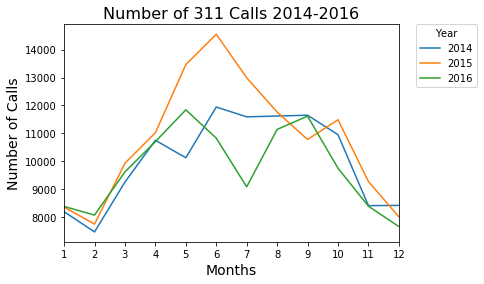

In [8]:
# Plot the number of calls by year.
plt.figure(figsize=(10,10))

plot = austin311_by_month.plot(kind='line')
plt.xticks(austin311_by_month.index)

plt.xlabel("Months", fontsize=14)
plt.ylabel("Number of Calls", fontsize=14)
plt.title("Number of 311 Calls 2014-2016", fontsize=16)
plt.legend(bbox_to_anchor=(1.05,1),loc= 2, borderaxespad = 0.,title="Year")

fig1 = plt.gcf()
plt.show()
fig1.savefig('images/Number_311_calls.png', bbox_inches='tight', dpi=200)